# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
user_data = pd.read_csv('/datasets/megaline_users.csv')
calls_data = pd.read_csv('/datasets/megaline_calls.csv')
messages_data = pd.read_csv('/datasets/megaline_messages.csv')
internet_data = pd.read_csv('/datasets/megaline_internet.csv')
plans_data = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
display(plans_data.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Primero para visualizar informacion general del data frame (df) utilizo info y con este método puedo visualizar que hay 2 entradas, y un total de 8 columnas.
Este df posee las tarifas de los planes por lo que las columnas poseen los mensajes, llamadas y datos móviles que incluye cada plan, los costos mensuales y los costos por cada servicio por minutos si se exceden los clientes. No se observan valores ausentes. Los tipos de datos que posee son datos numéricos enteros y flotantes, y una columna es de tipo object que sería la columna 'plan_name'.

Luego imprimí una muestra de los datos con head() y se puede visualizar el plan completo según la Tarifa.

## Corregir datos


No se observan errores a corregir en este df.

## Enriquecer los datos

In [5]:
display(plans_data.describe(include='object'))
print()
print('Valores duplicados en este df:')
print(plans_data.isna().sum())

,plan_name
count,2
unique,2
top,surf
freq,1



Valores duplicados en este df:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


Plan_name tiene dos columnas, dos valores unicos que son los planes, y no se observan valores ausentes.

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
user_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
display(user_data.sample(7, random_state= 500))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
57,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,NaN
70,1070,Jacelyn,Contreras,66,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-05-12,surf,NaN
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,NaN
108,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaN
318,1318,Huey,Walsh,54,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-29,surf,NaN
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaN
366,1366,Rod,Huff,62,"Cincinnati, OH-KY-IN MSA",2018-07-30,surf,NaN


Este df tiene 500 entradas, 8 columnas, con datos generales de cada cliente. Con el método info se puede ver que en la columna churn date hay valores ausentes, se podría arreglar cambiando todos los NaN por Unknow con el método fillna. 

### Corregir los datos

In [8]:
print('Valores ausentes en la columna churn_date:')
display(user_data['churn_date'].isna().sum())
print('Valores duplicados:')
print(user_data.duplicated().sum())

Valores ausentes en la columna churn_date:


466

Valores duplicados:
0


In [9]:
user_data['churn_date'] = user_data['churn_date'].fillna('Unknown')
print('Valores ausentes en la columna churn_date:')
print(user_data['churn_date'].isna().sum())

Valores ausentes en la columna churn_date:
0


In [10]:
user_data.rename(columns={'plan': 'plan_name'}, inplace=True)
user_data.columns #renombro la columna plan para usarla más adelante


Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date',
       'plan_name', 'churn_date'],
      dtype='object')

### Enriquecer los datos

In [11]:
user_data.describe(include='object')

,first_name,last_name,city,reg_date,plan_name,churn_date
count,500,500,500,500,500,500
unique,458,399,73,266,2,30
top,Jasper,Thompson,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,Unknown
freq,3,3,80,5,339,466


In [12]:
age_mean_by_user = user_data.groupby('user_id')['age'].mean()
print(age_mean_by_user.describe()) #Para observar la edad media de los clientes que tienen planes 

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64


## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas
display(calls_data.sample(7, random_state= 1377345))
print('Valores duplicados en este df:')
print(calls_data.duplicated().sum())

,id,user_id,call_date,duration
1363,1008_4,1008,2018-10-12,16.53
36573,1138_537,1138,2018-09-12,12.01
32092,1120_538,1120,2018-11-09,0.01
136699,1495_139,1495,2018-11-18,3.26
53557,1192_614,1192,2018-12-04,15.94
68809,1247_142,1247,2018-08-15,0.00
131129,1471_77,1471,2018-10-22,9.71


Valores duplicados en este df:
0


Este df posee 137735 entradas totales, 4 columnas con datos de las llamadas telefónicas, duración, día y usuario que realizó la llamada, no se observan valores ausentes.

### Corregir los datos

In [15]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'])
calls_data['month'] = calls_data['call_date'].dt.month
display(calls_data['call_date'])

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

### Enriquecer los datos

In [16]:
#Agrupo a los usuarios por la duración de llamadas y cuento el total de minutos
calls_mean_by_user = calls_data.groupby('user_id')['duration'].count()
print(calls_mean_by_user.describe()) 

count     481.000000
mean      286.351351
std       238.182107
min         2.000000
25%       108.000000
50%       216.000000
75%       413.000000
max      1300.000000
Name: duration, dtype: float64


## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes
display(messages_data.sample(7, random_state= 76051))
print('Valores ausentes en la columna churn_date:')
print(messages_data.isna().sum())

,id,user_id,message_date
65138,1417_8,1417,2018-12-12
29945,1187_53,1187,2018-10-05
72660,1470_288,1470,2018-10-02
22910,1137_326,1137,2018-10-25
66048,1432_15,1432,2018-11-23
69870,1454_232,1454,2018-10-13
46614,1316_547,1316,2018-09-26


Valores ausentes en la columna churn_date:
id              0
user_id         0
message_date    0
dtype: int64


La información general del df cuenta con 76051 entradas, 3 columnas, con la información de los usuarios, el día que mandó el mensaje y id que identifica cada mensaje. No aparecen valores ausentes, el tipo de valores en dos columnas es tipo 'object' y en la otraes 'int64'. No se observan valores ausentes.

### Corregir los datos

In [19]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'])
messages_data['month'] = messages_data['message_date'].dt.month
print(messages_data['message_date'])

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]


### Enriquecer los datos

In [20]:
messages_count_by_user = messages_data.groupby('user_id')['message_date'].count()
print(messages_count_by_user.describe()) #Agrupo a los usuarios por los días en los que han enviado sms y los cuento

count     402.000000
mean      189.181592
std       192.207920
min         1.000000
25%        60.000000
50%       126.500000
75%       258.750000
max      1288.000000
Name: message_date, dtype: float64


## Internet

In [21]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Imprime una muestra de datos para el tráfico de internet
display(internet_data.sample(7, random_state= 76051))
print('Valores ausentes en la columna churn_date:')
print(internet_data.isna().sum())

,id,user_id,session_date,mb_used
37480,1170_102,1170,2018-12-03,502.70
31721,1144_461,1144,2018-07-07,360.02
86279,1400_416,1400,2018-07-02,23.58
103337,1494_219,1494,2018-10-07,340.38
5919,1032_80,1032,2018-12-25,114.04
8872,1046_157,1046,2018-06-15,0.00
25685,1120_215,1120,2018-05-18,980.42


Valores ausentes en la columna churn_date:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


El df de internet contiene 104825 entradas, 4 columnas, con datos del usuario que utilizo md, la cantidad usados, el día y el id único de cada sesión.
No se observan valores ausentes, el tipo de valores de las columnas son object, int64 y float.

### Corregir los datos

In [23]:
internet_data['session_date']= pd.to_datetime(internet_data['session_date'])
internet_data['month'] = internet_data['session_date'].dt.month
print(internet_data['session_date'])

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]


In [24]:
internet_data['gb_used'] = internet_data['mb_used'] / 1024
print(internet_data['mb_used'])

0          89.86
1           0.00
2         660.40
3         270.99
4         880.22
           ...  
104820    218.06
104821    304.72
104822    292.75
104823      0.00
104824    758.31
Name: mb_used, Length: 104825, dtype: float64


### Enriquecer los datos

In [25]:
internet_used_by_user = internet_data.groupby('user_id')['mb_used'].mean()
print(internet_used_by_user.describe()) #Agrupo los usuarios por mb_used y calculo la média de datos usados 

count    489.000000
mean     370.762239
std       87.689742
min       92.680000
25%      316.837538
50%      330.936093
75%      446.352632
max      771.312000
Name: mb_used, dtype: float64


## Estudiar las condiciones de las tarifas

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
tarifa= plans_data.head()
display(tarifa)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [27]:
calls_month = calls_data.groupby(['user_id','month'])['id'].count().reset_index()
display(calls_month.head())

sms_month = messages_data.groupby(['user_id','month'])['id'].count().reset_index()
display(sms_month.head())

# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
mb_month = internet_data.groupby(['user_id','month'])['mb_used'].sum().reset_index()

#Redondeamos el consumo mensual 1gb = 1024 mb, 
#el redondeo es por mes, no individual como las llamadas.

mb_month['gb_round'] = mb_month['mb_used'] / 1024
mb_month['gb_round'] = np.ceil(mb_month['gb_round'])
display(mb_month.head())

# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.
calls_data['duration_round'] = np.ceil(calls_data['duration'])
min_month = calls_data.groupby(['user_id','month'])['duration_round'].sum().reset_index()
display(min_month.head())

resumen = (pd.merge(calls_month, min_month, on=['user_id', 'month'], how='outer')
             .merge(sms_month, on=['user_id', 'month'], how='outer')
             .merge(mb_month, on=['user_id', 'month'], how='outer')
          )

# Renombramos las columas para cantidad de mensajes y llamadas
resumen = resumen.rename(columns={'id_x': 'n_calls'})
resumen = resumen.rename(columns={'id_y': 'n_sms'}) 
resumen = resumen.fillna(0)
        
# Añade la información del plan
   
users = user_data[['user_id', 'plan_name', 'city']]


resumen = users.merge(resumen, on=['user_id'], how='right').merge(plans_data, on='plan_name', how='right')

#Agregamos una columna para dejar los megas inluídos en el plan en gigas

resumen['gb_per_month_included'] = resumen['mb_per_month_included'] / 1024

        # Calcula el ingreso mensual para cada usuario
#Llamadas
resumen['cargo_calls'] = (resumen['duration_round'] - resumen['minutes_included']) * resumen['usd_per_minute'] 

#Corregimos los números negativos dejándolos en 0 ya que no sobrepasaron los límites del plan
resumen['cargo_calls'] = np.where(resumen['cargo_calls'] < 0, 0, resumen['cargo_calls'])


#SMS
resumen['cargo_sms'] = (resumen['n_sms'] - resumen['messages_included']) * resumen['usd_per_message'] 

#Corregimos los números negativos dejándolos en 0 ya que no sobrepasaron los límites del plan
resumen['cargo_sms'] = np.where(resumen['cargo_sms'] < 0, 0, resumen['cargo_sms'])


#Internet
resumen['cargo_internet'] = (resumen['gb_round'] - resumen['gb_per_month_included']) * resumen['usd_per_gb']


#Corregimos los números negativos dejándolos en 0 ya que no sobrepasaron los límites del plan
resumen['cargo_internet'] = np.where(resumen['cargo_internet'] < 0, 0, resumen['cargo_internet'])

#Agregamos una columna con el ingreso total
resumen['total_ingreso'] = resumen['usd_monthly_pay'] + resumen['cargo_calls'] + resumen['cargo_sms'] + resumen['cargo_internet']

resumen.head()
       
display(resumen)

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


,user_id,month,mb_used,gb_round
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


,user_id,month,duration_round
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


,user_id,plan_name,city,month,n_calls,duration_round,n_sms,mb_used,gb_round,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,cargo_calls,cargo_sms,cargo_internet,total_ingreso
0,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",8,27.0,182.0,30.0,6919.15,7.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",9,49.0,315.0,44.0,13314.82,14.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",10,65.0,393.0,53.0,22330.49,22.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.09,70.0,90.09
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",11,64.0,426.0,36.0,18504.30,19.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",12,56.0,412.0,44.0,19369.18,19.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",12,0.0,0.0,78.0,36730.05,36.0,1000,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,42.0,112.00
2289,1224,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",6,0.0,0.0,5.0,2966.21,3.0,1000,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00
2290,1482,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",10,0.0,0.0,2.0,0.00,0.0,1000,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00
2291,1108,ultimate,"Salt Lake City, UT MSA",12,0.0,0.0,0.0,233.17,1.0,1000,...,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00


In [28]:
resumen.query("user_id == 1001")

,user_id,plan_name,city,month,n_calls,duration_round,n_sms,mb_used,gb_round,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,cargo_calls,cargo_sms,cargo_internet,total_ingreso
0,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",8,27.0,182.0,30.0,6919.15,7.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",9,49.0,315.0,44.0,13314.82,14.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",10,65.0,393.0,53.0,22330.49,22.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.09,70.0,90.09
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",11,64.0,426.0,36.0,18504.30,19.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",12,56.0,412.0,44.0,19369.18,19.0,50,...,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00


In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_used_per_month = calls_data.groupby(['user_id', 'month'])['id'].count().reset_index(name='total_calls')
display(calls_per_used_per_month.head())

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_used_per_month = calls_data.groupby(['user_id', 'month'])['duration'].sum().reset_index(name= 'total_duration')
display(minutes_used_per_month.head())


,user_id,month,total_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
sms_per_user_per_month = messages_data.groupby(['user_id', 'month']).count()
sms_per_user_per_month = sms_per_user_per_month.reset_index().rename(columns={'message_date': 'total_messages'})
display(sms_per_user_per_month.head())




,user_id,month,id,total_messages
0,1000,12,11,11
1,1001,8,30,30
2,1001,9,44,44
3,1001,10,53,53
4,1001,11,36,36


In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_user_per_month = internet_data.groupby(['user_id', 'month']).sum()
internet_per_user_per_month = internet_per_user_per_month.reset_index().rename(columns={'mb_used': 'total_mb_used'})
internet_per_user_per_month = np.ceil(internet_per_user_per_month)
display(internet_per_user_per_month.head())




,user_id,month,total_mb_used,gb_used
0,1000.0,12.0,1902.0,2.0
1,1001.0,8.0,6920.0,7.0
2,1001.0,9.0,13315.0,14.0
3,1001.0,10.0,22331.0,22.0
4,1001.0,11.0,18505.0,19.0


In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Fusion de datos de llamadas y minutos
merged_calls_min = pd.merge(calls_per_used_per_month, minutes_used_per_month, on=['user_id', 'month'], how='outer')

# Fusion de datos de llamadas, minutos y mensajes
merged_calls_min_sms = pd.merge(merged_calls_min, sms_per_user_per_month, on=['user_id', 'month'], how='outer')

# Fusion de datos de llamadas, minutos, mensajes e internet
fusion_pack = pd.merge(merged_calls_min_sms, internet_per_user_per_month, on=['user_id', 'month'], how='outer')

fusion_pack = fusion_pack.fillna(0)

display(fusion_pack)


,user_id,month,total_calls,total_duration,id,total_messages,total_mb_used,gb_used
0,1000.0,12.0,16.0,116.83,11.0,11.0,1902.0,2.0
1,1001.0,8.0,27.0,171.14,30.0,30.0,6920.0,7.0
2,1001.0,9.0,49.0,297.69,44.0,44.0,13315.0,14.0
3,1001.0,10.0,65.0,374.11,53.0,53.0,22331.0,22.0
4,1001.0,11.0,64.0,404.59,36.0,36.0,18505.0,19.0
...,...,...,...,...,...,...,...,...
2288,1349.0,12.0,0.0,0.00,61.0,61.0,13040.0,13.0
2289,1361.0,5.0,0.0,0.00,2.0,2.0,1520.0,2.0
2290,1482.0,10.0,0.0,0.00,2.0,2.0,0.0,0.0
2291,1108.0,12.0,0.0,0.00,0.0,0.0,234.0,1.0


In [34]:
# Añade la información de la tarifa
f_plans= pd.merge(plans_data, user_data, how= 'left', on= ['plan_name'])
fusion_pack = pd.merge(fusion_pack, f_plans, on= 'user_id', how= 'left')  
display(fusion_pack)

#convierto estos datos a enteros
fusion_pack['total_duration'] = fusion_pack['total_duration'].astype('int64')
fusion_pack['total_messages'] = fusion_pack['total_messages'].astype('int64')
fusion_pack['total_calls'] = fusion_pack['total_calls'].astype('int64')

,user_id,month,total_calls,total_duration,id,total_messages,total_mb_used,gb_used,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,plan_name,first_name,last_name,age,city,reg_date,churn_date
0,1000.0,12.0,16.0,116.83,11.0,11.0,1902.0,2.0,1000,30720,...,7,0.01,0.01,ultimate,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,Unknown
1,1001.0,8.0,27.0,171.14,30.0,30.0,6920.0,7.0,50,15360,...,10,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown
2,1001.0,9.0,49.0,297.69,44.0,44.0,13315.0,14.0,50,15360,...,10,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown
3,1001.0,10.0,65.0,374.11,53.0,53.0,22331.0,22.0,50,15360,...,10,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown
4,1001.0,11.0,64.0,404.59,36.0,36.0,18505.0,19.0,50,15360,...,10,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349.0,12.0,0.0,0.00,61.0,61.0,13040.0,13.0,50,15360,...,10,0.03,0.03,surf,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,Unknown
2289,1361.0,5.0,0.0,0.00,2.0,2.0,1520.0,2.0,50,15360,...,10,0.03,0.03,surf,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,Unknown
2290,1482.0,10.0,0.0,0.00,2.0,2.0,0.0,0.0,1000,30720,...,7,0.01,0.01,ultimate,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,Unknown
2291,1108.0,12.0,0.0,0.00,0.0,0.0,234.0,1.0,1000,30720,...,7,0.01,0.01,ultimate,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,Unknown


In [35]:
#Transformo los mb a gb y renombro las columnas para trabajar con estos datos a continuación
fusion_pack['total_mb_used'] = fusion_pack['total_mb_used']/1024
fusion_pack['mb_per_month_included'] = fusion_pack['mb_per_month_included']/1024
fusion_pack = fusion_pack.rename(columns= {'total_mb_used':'total_gb_used', 'mb_per_month_included':'gb_per_month_included'})

In [36]:

# Calculo el ingreso mensual para cada usuario
fusion_pack['call'] = fusion_pack['total_duration'] - fusion_pack['minutes_included']
fusion_pack['sms'] = fusion_pack['total_messages'] - fusion_pack['messages_included']
fusion_pack['gb'] =   np.ceil(fusion_pack['total_gb_used']) - fusion_pack['gb_per_month_included']

fusion_pack['call'] = np.where(fusion_pack['call'] < 0, 0, fusion_pack['call'])
fusion_pack['sms'] = np.where(fusion_pack['sms'] < 0, 0, fusion_pack['sms'])
fusion_pack['gb'] = np.where(fusion_pack['gb'] < 0, 0, fusion_pack['gb'])
# Calcular los cargos por exceso de los planes  #EL CARGO DEBE DE CALCULARSE EN GB

fusion_pack['total_call'] = fusion_pack['call'] * fusion_pack['usd_per_minute']
fusion_pack['total_sms'] = fusion_pack['sms'] * fusion_pack['usd_per_message']
fusion_pack['total_gb'] = fusion_pack['gb'] * fusion_pack['usd_per_gb']

fusion_pack['total_ingreso'] = (fusion_pack['total_call'] + fusion_pack['total_sms'] + fusion_pack['total_gb']) + fusion_pack['usd_monthly_pay']

display(fusion_pack[['user_id', 'total_ingreso', 'plan_name']])

verification = fusion_pack.query('user_id == 1001')
display(verification)

dimensiones = fusion_pack.shape
display(dimensiones)



,user_id,total_ingreso,plan_name
0,1000.0,70.00,ultimate
1,1001.0,20.00,surf
2,1001.0,20.00,surf
3,1001.0,90.09,surf
4,1001.0,60.00,surf
...,...,...,...
2288,1349.0,20.33,surf
2289,1361.0,20.00,surf
2290,1482.0,70.00,ultimate
2291,1108.0,70.00,ultimate


,user_id,month,total_calls,total_duration,id,total_messages,total_gb_used,gb_used,messages_included,gb_per_month_included,...,city,reg_date,churn_date,call,sms,gb,total_call,total_sms,total_gb,total_ingreso
1,1001.0,8.0,27,171,30.0,30,6.757812,7.0,50,15.0,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown,0,0,0.0,0.0,0.00,0.0,20.00
2,1001.0,9.0,49,297,44.0,44,13.002930,14.0,50,15.0,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown,0,0,0.0,0.0,0.00,0.0,20.00
3,1001.0,10.0,65,374,53.0,53,21.807617,22.0,50,15.0,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown,0,3,7.0,0.0,0.09,70.0,90.09
4,1001.0,11.0,64,404,36.0,36,18.071289,19.0,50,15.0,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown,0,0,4.0,0.0,0.00,40.0,60.00
5,1001.0,12.0,56,392,44.0,44,18.916016,19.0,50,15.0,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,Unknown,0,0,4.0,0.0,0.00,40.0,60.00


(2293, 29)

## Estudia el comportamiento de usuario

### Llamadas

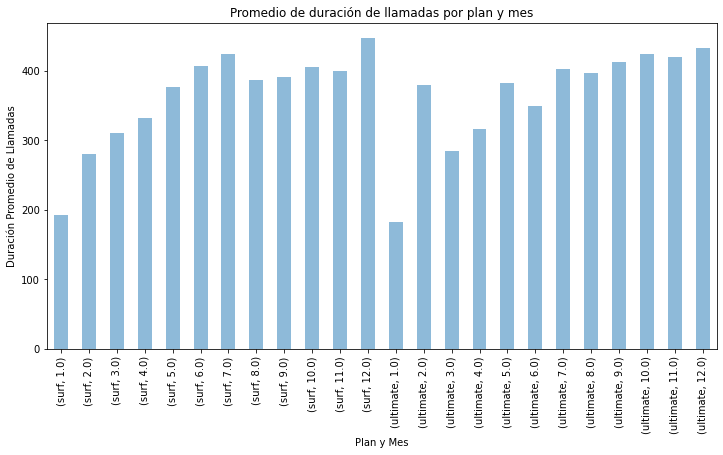

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

prom_calls_per_month = fusion_pack.groupby(['plan_name', 'month'])['total_duration'].mean()
prom_calls_per_month.plot(title='Promedio de duración de llamadas por plan y mes',
        figsize=[12, 6],
        xlabel='Plan y Mes',
        ylabel='Duración Promedio de Llamadas',
        kind= 'bar',
        alpha= 0.5)
plt.show()


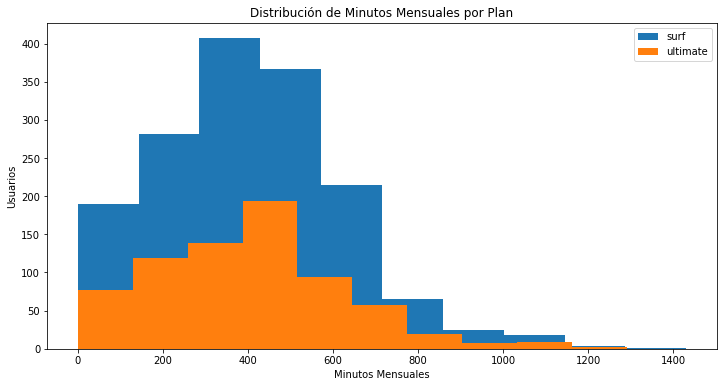

In [38]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
total_minutes_per_user_per_month = fusion_pack.groupby(['user_id', 'plan_name', 'month'])['total_duration'].sum().reset_index()

plt.figure(figsize=[12, 6])
for plan, data in total_minutes_per_user_per_month.groupby('plan_name'):
    plt.hist(data['total_duration'], label=plan)

plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos Mensuales')
plt.ylabel('Usuarios')
plt.legend()
plt.show()
  

In [39]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#media mensual de llamadas
mean_call_per_month = fusion_pack.groupby(['plan_name', 'month'])['total_duration'].mean()
print("Media de duración de llamadas por plan y mes:")
display(mean_call_per_month)

print()

var_call_per_month= fusion_pack.groupby(['plan_name', 'month'])['total_duration'].var()
print("Varianza de duración de llamadas por plan y mes:")
display(var_call_per_month)

Media de duración de llamadas por plan y mes:


plan_name  month
surf       1.0      192.000000
           2.0      280.333333
           3.0      310.434783
           4.0      331.920000
           5.0      376.558442
           6.0      406.701031
           7.0      424.008264
           8.0      386.679012
           9.0      390.474227
           10.0     405.236287
           11.0     399.091873
           12.0     447.006289
ultimate   1.0      182.750000
           2.0      379.571429
           3.0      285.166667
           4.0      316.095238
           5.0      383.206897
           6.0      349.425532
           7.0      403.271186
           8.0      396.788732
           9.0      412.779070
           10.0     424.707547
           11.0     419.960630
           12.0     432.576159
Name: total_duration, dtype: float64


Varianza de duración de llamadas por plan y mes:


plan_name  month
surf       1.0      14792.000000
           2.0      47022.500000
           3.0      31860.256917
           4.0      45611.871020
           5.0      53270.618250
           6.0      40755.357603
           7.0      54408.974931
           8.0      48598.616824
           9.0      41577.058918
           10.0     46722.198169
           11.0     46101.374508
           12.0     56982.826459
ultimate   1.0      15038.250000
           2.0      68473.619048
           3.0      54232.696970
           4.0      31099.590476
           5.0      39304.527094
           6.0      37915.641073
           7.0      64851.994155
           8.0      47668.911871
           9.0      51017.985910
           10.0     48375.827942
           11.0     54262.228596
           12.0     55775.525828
Name: total_duration, dtype: float64

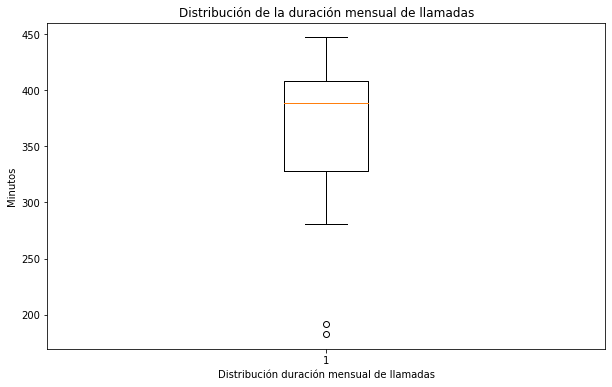

In [40]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))
plt.boxplot(mean_call_per_month)
plt.xlabel('Distribución duración mensual de llamadas')
plt.ylabel('Minutos')
plt.title('Distribución de la duración mensual de llamadas')
plt.show()


En el gráfico 13.1 se puede observar que la duración de llamadas en ambos planes mes a mes es similar y duran entre 250 y 350 minutos aprox.
Al comparar en el gráfico siguiente los minutos que necesitan mensualmente los usuarios por plan, se puede ver que los clientes del plan Ultimate y Surf en promedio requieren en promedio 400-700 minutos al mes la mayoria de los usuarios, se observan datos sesgados a la derecha.
Los clientes que más utilizan sus minutos y hablan por telefono son los que tienen contratado el plan Surf. La media entre los usuarios del plan Surf se encuentra entre 250-400 minutos y entre los usuarios del plan Ultimate la media esta entre 400-500 minutos. 
Los usuarios del plan Ultimate a pesar de tener incluido en el plan 3000 minutos, la mayoria no llega a utilizar 17% aproximadamente de su plan, mientras que los del plan Surf que solo tienen 500 minutos tienen más tendencia a utilizar más minutos.
La duración media de llamadas varía y se mantiene en ascenso a lo largo del año en ambos planes.
La varianza tiene variaciones de mes a mes, no es un valor constante por lo que puede indicar que dependiendo del mes o época del año los usuarios harán más o menos llamadas.

En el gráfico de caja se puede ver que la mediana se encuentra en 390 aprox, Q1 se encuentra en 330 aprox. Q2 en 380 y Q3 en 420. A partir de 200 hacía abajo se observan valores atípicos lo que podria indicar que hay tendencia hacia la izq. y es de asimetría negativa.

### Mensajes

In [41]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
sms_per_month= fusion_pack.groupby(['user_id', 'month', 'plan_name']).sum().reset_index()

ultimate_users = sms_per_month[sms_per_month['plan_name'] == 'ultimate']
surf_users = sms_per_month[sms_per_month['plan_name'] == 'surf']

print("Usuarios del plan Ultimate:")
display(ultimate_users.sample(8, random_state= 720))
print("\nUsuarios del plan Surf:")
display(surf_users.sample(8, random_state= 1573))

Usuarios del plan Ultimate:


,user_id,month,plan_name,total_calls,total_duration,id,total_messages,total_gb_used,gb_used,messages_included,...,usd_per_message,usd_per_minute,age,call,sms,gb,total_call,total_sms,total_gb,total_ingreso
607,1128.0,9.0,ultimate,6,16,43.0,43,20.708008,21.0,1000,...,0.01,0.01,41,0,0,0.0,0.0,0.0,0.0,70.0
1017,1213.0,11.0,ultimate,10,40,11.0,11,1.893555,2.0,1000,...,0.01,0.01,47,0,0,0.0,0.0,0.0,0.0,70.0
2106,1456.0,12.0,ultimate,62,405,43.0,43,12.115234,13.0,1000,...,0.01,0.01,66,0,0,0.0,0.0,0.0,0.0,70.0
948,1196.0,10.0,ultimate,77,481,36.0,36,24.906250,25.0,1000,...,0.01,0.01,46,0,0,0.0,0.0,0.0,0.0,70.0
1813,1390.0,9.0,ultimate,91,653,0.0,0,10.998047,11.0,1000,...,0.01,0.01,61,0,0,0.0,0.0,0.0,0.0,70.0
586,1124.0,10.0,ultimate,34,220,30.0,30,3.600586,4.0,1000,...,0.01,0.01,48,0,0,0.0,0.0,0.0,0.0,70.0
287,1063.0,12.0,ultimate,13,94,0.0,0,9.760742,10.0,1000,...,0.01,0.01,60,0,0,0.0,0.0,0.0,0.0,70.0
137,1038.0,12.0,ultimate,78,444,113.0,113,43.965820,44.0,1000,...,0.01,0.01,32,0,0,14.0,0.0,0.0,98.0,168.0



Usuarios del plan Surf:


,user_id,month,plan_name,total_calls,total_duration,id,total_messages,total_gb_used,gb_used,messages_included,...,usd_per_message,usd_per_minute,age,call,sms,gb,total_call,total_sms,total_gb,total_ingreso
1440,1313.0,11.0,surf,89,652,39.0,39,19.229492,20.0,50,...,0.03,0.03,49,152,0,5.0,4.56,0.0,50.0,74.56
338,1072.0,11.0,surf,76,441,17.0,17,32.215820,33.0,50,...,0.03,0.03,66,0,0,18.0,0.00,0.0,180.0,200.00
1432,1312.0,9.0,surf,68,401,37.0,37,18.115234,19.0,50,...,0.03,0.03,42,0,0,4.0,0.00,0.0,40.0,60.00
1578,1341.0,10.0,surf,65,463,44.0,44,10.442383,11.0,50,...,0.03,0.03,28,0,0,0.0,0.00,0.0,0.0,20.00
1038,1216.0,12.0,surf,49,355,0.0,0,15.320312,16.0,50,...,0.03,0.03,29,0,0,1.0,0.00,0.0,10.0,30.00
1854,1399.0,11.0,surf,39,277,29.0,29,18.250000,19.0,50,...,0.03,0.03,24,0,0,4.0,0.00,0.0,40.0,60.00
427,1090.0,5.0,surf,32,174,19.0,19,9.368164,10.0,50,...,0.03,0.03,30,0,0,0.0,0.00,0.0,0.0,20.00
1485,1324.0,7.0,surf,134,919,120.0,120,19.320312,20.0,50,...,0.03,0.03,18,419,70,5.0,12.57,2.1,50.0,84.67


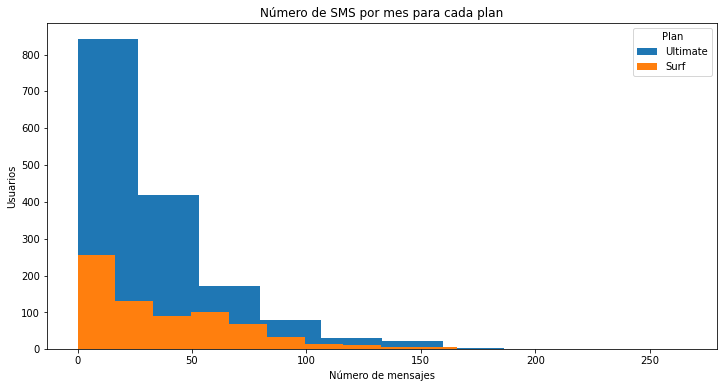

In [42]:
plt.figure(figsize=[12, 6])
for plan, data in sms_per_month.groupby('plan_name'):
    plt.hist(data['total_messages'], label=plan)

plt.title('Número de SMS por mes para cada plan')
plt.xlabel('Número de mensajes')
plt.ylabel('Usuarios')
plt.legend(title='Plan', labels=['Ultimate', 'Surf'])
plt.show()

En el plan Ultimate mandan más sms que los usuarios del plan surf, la mayoría de sms que envían los clientes de ultimate se encuentra entre 0-25.
En el plan Surf los clientes envían menos mensajes pero hay varios clientes que pasan el limite de mensajes mensual.
En el gráfico se observa una diferencia en la cantidad de sms enviados por clientes de cada plan al mes.

### Internet

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

In [44]:
gb_per_month= fusion_pack.groupby(['user_id', 'month', 'plan_name']).sum().reset_index()

ultimate_net_users = gb_per_month[gb_per_month['plan_name'] == 'ultimate']
surf_net_users = gb_per_month[gb_per_month['plan_name'] == 'surf']

gb_per_user_ultimate= ultimate_net_users.groupby('month')['total_gb_used'].sum()
gb_per_user_surf= surf_net_users.groupby('month')['total_gb_used'].sum()

print('Tráfico de Internet por mes: Ultimate')
display(gb_per_user_ultimate)
print()
print('Tráfico de Internet por mes: Surf')
display(gb_per_user_surf)

Tráfico de Internet por mes: Ultimate


month
1.0       27.025391
2.0      117.093750
3.0      214.711914
4.0      330.630859
5.0      470.824219
6.0      704.009766
7.0      941.769531
8.0     1235.235352
9.0     1425.245117
10.0    1823.227539
11.0    2112.638672
12.0    2702.027344
Name: total_gb_used, dtype: float64


Tráfico de Internet por mes: Surf


month
1.0        9.521484
2.0      107.045898
3.0      299.762695
4.0      585.188477
5.0     1047.986328
6.0     1449.505859
7.0     1983.276367
8.0     2657.151367
9.0     3143.390625
10.0    4006.742188
11.0    4515.770508
12.0    5631.138672
Name: total_gb_used, dtype: float64

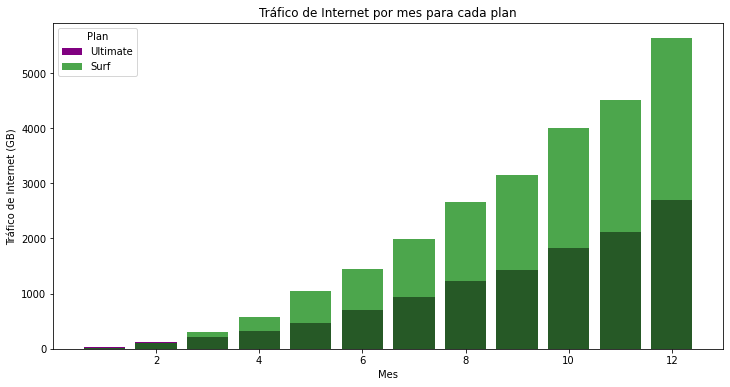

In [45]:
plt.figure(figsize=[12, 6])
plt.bar(gb_per_user_ultimate.index, gb_per_user_ultimate.values, color='purple', alpha=1, label= 'Ultimate')
plt.bar(gb_per_user_surf.index, gb_per_user_surf.values, color='green', alpha=0.7, label= 'Surf')
plt.title('Tráfico de Internet por mes para cada plan')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet (GB)')
plt.legend(title='Plan', labels=['Ultimate', 'Surf'])
plt.show()

En ambos planes a medida que avanza el año los clientes utilizan mayor cantidad de tráfico de internet, los clientes del plan Surf utilizan más gb en comparación a los del plan Ultimate.
Los usuarios del plan Surf los últimos meses del año utilizan el doble de gb.

## Ingreso

In [46]:
#agrupo por plan y mes el total de ingresos para compararlos
ingresos_per_plan = fusion_pack.groupby(['plan_name', 'month'])['total_ingreso'].describe()
display(ingresos_per_plan)

count       mean        std   min     25%     50%      75%  \
plan_name month                                                               
surf      1.0      2.0  20.000000   0.000000  20.0  20.000  20.000  20.0000   
          2.0      9.0  34.256667  20.735788  20.0  20.000  28.310  30.0000   
          3.0     23.0  45.790000  38.827700  20.0  20.000  20.000  60.0600   
          4.0     50.0  40.452000  34.595712  20.0  20.000  20.000  48.6025   
          5.0     77.0  47.230390  44.154801  20.0  20.000  20.840  70.0000   
          6.0     97.0  48.926495  44.470845  20.0  20.000  30.000  60.0000   
          7.0    121.0  62.216116  54.046552  20.0  20.030  40.330  84.6700   
          8.0    162.0  63.568025  59.769252  20.0  20.000  41.500  86.2550   
          9.0    194.0  57.944278  47.456665  20.0  20.000  40.045  80.5550   
          10.0   237.0  65.042236  56.383129  20.0  20.000  50.000  83.2700   
          11.0   283.0  57.624028  49.851480  20.0  20.000  40.000  80.0000   
          12.0   318.0  70.097516  67.753167  20.0  22.565  50.000  90.2025   
ultimate  1.0      4.0  70.000000   0.000000  70.0  70.000  70.000  70.0000   
          2.0      7.0  70.000000   0.000000  70.0  70.000  70.000  70.0000   
          3.0     12.0  74.666667  12.062966  70.0  70.000  70.000  71.7500   
          4.0     21.0  73.000000  10.972693  70.0  70.000  70.000  70.0000   
          5.0     29.0  70.724138   3.899602  70.0  70.000  70.000  70.0000   
          6.0     47.0  71.638298   8.661322  70.0  70.000  70.000  70.0000   
          7.0     59.0  71.898305  10.221166  70.0  70.000  70.000  70.0000   
          8.0     71.0  72.859155  12.442204  70.0  70.000  70.000  70.0000   
          9.0     86.0  72.034884   8.714353  70.0  70.000  70.000  70.0000   
          10.0   106.0  72.311321  13.023322  70.0  70.000  70.000  70.0000   
          11.0   127.0  71.708661   9.729770  70.0  70.000  70.000  70.0000   
          12.0   151.0  73.291391  14.589763  70.0  70.000  70.000  70.0000   

                    max  
plan_name month          
surf      1.0     20.00  
          2.0     70.00  
          3.0    170.00  
          4.0    150.00  
          5.0    230.84  
          6.0    240.00  
          7.0    260.00  
          8.0    380.00  
          9.0    240.78  
          10.0   330.00  
          11.0   290.36  
          12.0   588.63  
ultimate  1.0     70.00  
          2.0     70.00  
          3.0    112.00  
          4.0    119.00  
          5.0     91.00  
          6.0    126.00  
          7.0    126.00  
          8.0    140.00  
          9.0    119.00  
          10.0   182.00  
          11.0   154.00  
          12.0   182.00

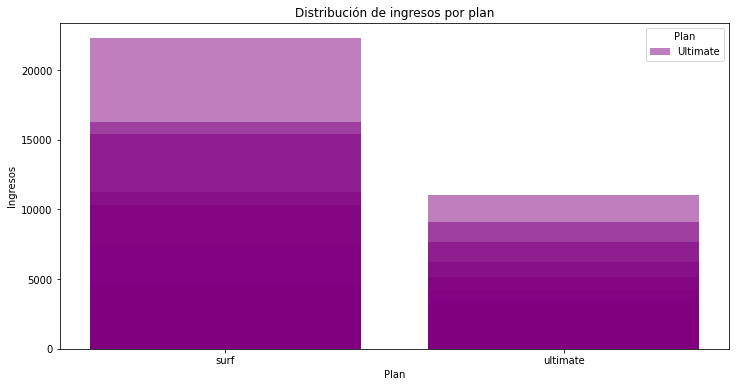

In [47]:
graph= fusion_pack.groupby(['plan_name', 'month'])['total_ingreso'].sum().reset_index()
plt.figure(figsize=[12, 6])
plt.bar(graph['plan_name'], graph['total_ingreso'], color='purple', alpha=0.5)
plt.title('Distribución de ingresos por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos')
plt.legend(title='Plan', labels=['Ultimate', 'Surf'])
plt.show()

Se puede observar que los clientes del plan Surf tienden a pasarse del limite establecido del plan y pagar extras durante los meses, siendo de septiembre a octubre los meses que más ocurre esto.

En el gráfico se puede observar que los ingresos del plan Surf son mayores a los del plan Ultimate, teniendo en cuenta que el plan Surf posee mayor cantidad de clientes y van dependiendo del consumo de sus clientes mes a mes, en cambio, los ingresos del plan Ultimate son fijos y posee menor cantidad de clientes.

## Prueba las hipótesis estadísticas

In [48]:
# Prueba las hipótesis
#H0: Los ingresos mensuales de los usuarios de los planes Surf y Ultimate son iguales.
#Ha: Los ingresos mensuales de los usuarios de los planes Surf y Ultimate son diferentes.
ingresos_ultimate = fusion_pack[fusion_pack['plan_name'] == 'ultimate']['total_ingreso']
ingresos_surf = fusion_pack[fusion_pack['plan_name'] == 'surf']['total_ingreso']

alpha= 0.05
results = st.ttest_ind(ingresos_ultimate,ingresos_surf, equal_var= False)

print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  3.438526967606285e-16
Rechazamos la hipótesis nula


In [49]:
# Prueba las hipótesis
#H0: el ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones
#Ha: el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

ingresos_nynj= fusion_pack[fusion_pack['city'] == 'NY-NJ']['total_ingreso']
ingresos_other_rg= fusion_pack[fusion_pack['city'] != 'NY-NJ']['total_ingreso']

alpha= 0.05
result_region = st.ttest_ind(ingresos_nynj,ingresos_other_rg, equal_var= False)

print('valor p: ', result_region.pvalue)

if (result_region.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  nan
No podemos rechazar la hipótesis nula


## Conclusión general


En este trabajo se trabajaron datos de clientes de los planes Surf y Ultimate.
1) A lo largo del análisis de datos que se realizó se observó que el plan Surf posee mayor cantidad de clientes quienes cancelan mes a mes 20 dolares + cobros extras en caso de utilizar más de lo que incluye el plan, los costos individuales de sus productos son más caros que los del plan Ultimate, se pudo ver que a fin de año los clientes del plan Surf terminan pagando más del doble de lo que pagan los clientes del plan Ultimate (588 dolares).

Con respecto al plan Ultimate posee menos clientes en comparación al otro plan, a pesar de que este plan incluye mayor cantidad de minutos, sms y gb. La cuota mensual es de 70, la media de lo que deben cancelar los clientes ronda entre los 70-73 dolares, sin embargo el máximo que han llegado a pagar los clientes ha sido 182 dolares. 
Debido a esto es posible concluir que los clientes optan por la opción más barata a pesar de que es un plan más básico, sin considerar en el costo de los cobros extras y de cuánto realmente utilizan comunmente estos servicios.

2) Se pudo ver que dependiendo de la época del año aumentan y disminuyen la cantidad de minutos, sms y gb gastados por los clientes y es similiar la tendencia de aumento en ambos planes.

3) Los meses que más utilizan gb y minutos los clientes de ambos planes son de octubre a diciembre.
